# Homework: Feature Engineering


Use Python to reproduce the essential parts of the R feature engineering script:
Most methods are explained in Chapter 4 of the Python Machine Learning Book.
Using the USSeatBelt data, carry out the following steps:
1. Scale the numeric variables (StandardScaler)
2. Use one-hot-encoding of the categorical features (LabelEncoder)
3. Impute missing values using k-NN (IterativeImputer)
4. Check for correlated features using seaborn and pandas with sth. like sns.heatmap(df.corr(),
annot = True)
5. Apply PCA using PCA from sklearn.decomposition
6. Use Random Forest to get feature importance scores
7. Apply recursive feature selection using RFE from sklearn.feature_selection
8. Use ElasticNet from sklearn.linear_model to fit a LASSO, Ridge and elastic net model. (Note
that confusingly, alpha in Python corresponds to lambda in R glmnet, and L1_ratio in Python to
alpha in the R implementation . . . )

## Imports

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
data = pd.read_csv("USSeatBelts.csv")
data.head()

,Unnamed: 0,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
0,1,AK,1983,3358,0.044669,NaN,no,no,yes,no,17973,28.234966,no
1,2,AK,1984,3589,0.037336,NaN,no,no,yes,no,18093,28.343542,no
2,3,AK,1985,3840,0.033073,NaN,no,no,yes,no,18925,28.372816,no
3,4,AK,1986,4008,0.025200,NaN,no,no,yes,no,18466,28.396652,no
4,5,AK,1987,3900,0.019487,NaN,no,no,yes,no,18021,28.453251,no


## 1 StandardScaler

In [97]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data.loc[:,["miles","fatalities","income","age"]])
print(scaled)

[[-0.86699111  3.75854629 -0.00407355 -4.06726067]
 [-0.86173313  2.56950266  0.02088322 -4.00328043]
 [-0.85601992  1.87820861  0.19391686 -3.98603021]
 ...
 [-0.78309109  0.42879675  0.55994957 -0.21837119]
 [-0.77589836 -0.33404891  0.73443902 -0.03703259]
 [-0.77098181 -0.55228634  0.95738621  0.14688658]]


## 2 One Hot Encoding

In [99]:
enc = OneHotEncoder(categories='auto')
onehot_encoded =pd.DataFrame( enc.fit_transform(data.loc[:,["drinkage"]]).toarray())
data["drinkage.no"]=onehot_encoded[0]
data["drinkage.yes"]=onehot_encoded[1]
onehot_encoded =pd.DataFrame( enc.fit_transform(data.loc[:,["speed65"]]).toarray())
data["speed65.no"]=onehot_encoded[0]
data["speed65.yes"]=onehot_encoded[1]
onehot_encoded =pd.DataFrame( enc.fit_transform(data.loc[:,["speed70"]]).toarray())
data["speed70.no"]=onehot_encoded[0]
data["speed70.yes"]=onehot_encoded[1]
onehot_encoded =pd.DataFrame( enc.fit_transform(data.loc[:,["alcohol"]]).toarray())
data["alcohol.no"]=onehot_encoded[0]
data["alcohol.yes"]=onehot_encoded[1]
onehot_encoded =pd.DataFrame( enc.fit_transform(data.loc[:,["enforce"]]).toarray())
data["enforce.no"]=onehot_encoded[0]
data["enforce.yes"]=onehot_encoded[1]
onehot_encoded =pd.DataFrame( enc.fit_transform(data.loc[:,["state"]]).toarray())
data["state.no"]=onehot_encoded[0]
data["state.yes"]=onehot_encoded[1]
data=data.drop(["drinkage","alcohol","speed65","speed70","enforce","state"],axis=1)

In [100]:

data.head()

,Unnamed: 0,year,miles,fatalities,seatbelt,income,age,drinkage.no,drinkage.yes,speed65.no,speed65.yes,speed70.no,speed70.yes,alcohol.no,alcohol.yes,enforce.no,enforce.yes,state.no,state.yes
0,1,1983,3358,0.044669,NaN,17973,28.234966,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,1984,3589,0.037336,NaN,18093,28.343542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1985,3840,0.033073,NaN,18925,28.372816,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,1986,4008,0.025200,NaN,18466,28.396652,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1987,3900,0.019487,NaN,18021,28.453251,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## 3 Imputing missing values

In [107]:
imputer = KNNImputer(n_neighbors=2)
result=imputer.fit_transform(data)
data=pd.DataFrame(result,columns=data.columns)
data.head()

,Unnamed: 0,year,miles,fatalities,seatbelt,income,age,drinkage.no,drinkage.yes,speed65.no,speed65.yes,speed70.no,speed70.yes,alcohol.no,alcohol.yes,enforce.no,enforce.yes,state.no,state.yes
0,1.0,1983.0,3358.0,0.044669,0.404,17973.0,28.234966,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,1984.0,3589.0,0.037336,0.404,18093.0,28.343542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,1985.0,3840.0,0.033073,0.458,18925.0,28.372816,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,1986.0,4008.0,0.025200,0.404,18466.0,28.396652,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,1987.0,3900.0,0.019487,0.404,18021.0,28.453251,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## 4 Heatmap Correlation

<AxesSubplot:>

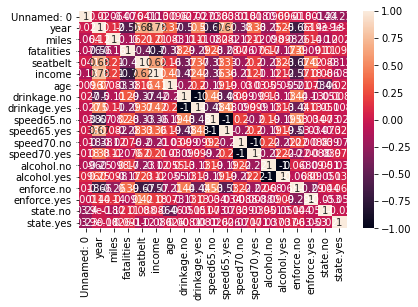

In [102]:
sns.heatmap(data.corr(),annot = True)


## 5 PCA 

In [103]:
from sklearn.decomposition import PCA

metrics= data.loc[:,["miles","fatalities","income","age"]]
pca = PCA()
pca.fit(metrics)
print(pca.components_)

[[ 9.99739633e-01 -2.28812070e-08  2.28181031e-02  3.26053104e-06]
 [-2.28181034e-02 -8.97603021e-07  9.99739623e-01  1.43835806e-04]
 [-2.23772594e-08  3.86566426e-04  1.43873092e-04 -9.99999915e-01]
 [ 2.40230148e-09  9.99999925e-01  8.42274968e-07  3.86566551e-04]]


In [104]:
print(pca.explained_variance_)


[1.93365182e+09 2.21548899e+07 2.40473706e+00 1.88631677e-05]


Manchmal frag ich mich was sich die Programmierer in R/Python bei den Libaries gedacht haben... In diesem Fall ist die Darstellung in R viel übersichtlicher und einfacher auszugeben...

## 6 Random Forest feature Importance

In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier = classifier.fit(
    data.loc[:,["year","miles","fatalities","seatbelt","income","age","drinkage.no","drinkage.yes","speed65.no","speed65.yes","speed70.no","speed70.yes","alcohol.no","alcohol.yes","enforce.no","enforce.yes"]],
    data["state.yes"])


feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = ["year","miles","fatalities","seatbelt","income","age","drinkage.no","drinkage.yes","speed65.no","speed65.yes","speed70.no","speed70.yes","alcohol.no","alcohol.yes","enforce.no","enforce.yes"],
                                    columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances.head(20))

,importance
miles,0.228203
fatalities,0.197674
income,0.151651
age,0.137174
seatbelt,0.105952
year,0.067478
enforce.no,0.033148
alcohol.yes,0.020391
alcohol.no,0.013596
speed65.yes,0.012793


## 7 RFE

In [115]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier())
rfe.fit(
    data.loc[:,["year","miles","fatalities","seatbelt","income","age","drinkage.no","drinkage.yes","speed65.no","speed65.yes","speed70.no","speed70.yes","alcohol.no","alcohol.yes","enforce.no","enforce.yes"]],
    data["state.yes"])


RFE(estimator=RandomForestClassifier())

In [118]:
print(rfe.ranking_)

[1 1 1 1 1 1 8 9 5 2 4 6 3 1 1 7]


## 8 Lasso